In [126]:
import numpy as np
import pandas as pd
import math
import lasio
import matplotlib.pyplot as plt  # GRAPHS
%matplotlib inline

In [127]:
las = lasio.read(r"C:\Users\Angelica\Desktop\Tinmiaq_2\registros_T2.las")
las_DM =lasio.read (r"C:\Users\Angelica\Desktop\Tinmiaq_2\DM-2077-4158ft.las")

In [128]:
df_1 = las.df()
df_2 = las_DM.df()
df_2 = df_2[["GR_EDTC",'DTCO']]
Depth= las_DM.index
df_1 = df_1[["GR_EDTC", "RHOZ", "DEPTH","AT90","NPHI"]]
df_1['Vsh'] = (df_1.GR_EDTC - 30) / (120 - 30)
df_1['Vclay']=((0.6)*df_1.Vsh) 

mud_density=1.13835   #en g/cc
sand_density=2.65
assumed_density_Vsh=2.75
df_1['grain_density']=((df_1.Vsh*assumed_density_Vsh)+(1-df_1.Vsh)*sand_density)
df_1['porosity']=(df_1.grain_density-df_1.RHOZ)/(df_1.grain_density-mud_density)

In [129]:
top=3660
bottom=3895
dt = 2800
bt=3800
temp=((0.0198*df_1.DEPTH)+ 26.921)
v= 400000
b=0.88
tsup= 25
WS=18000
RWs= (v/tsup/WS)**b
tf=temp
Kt1=6.77
df_1['RW2']=(RWs*(tsup+Kt1))/(temp+Kt1)

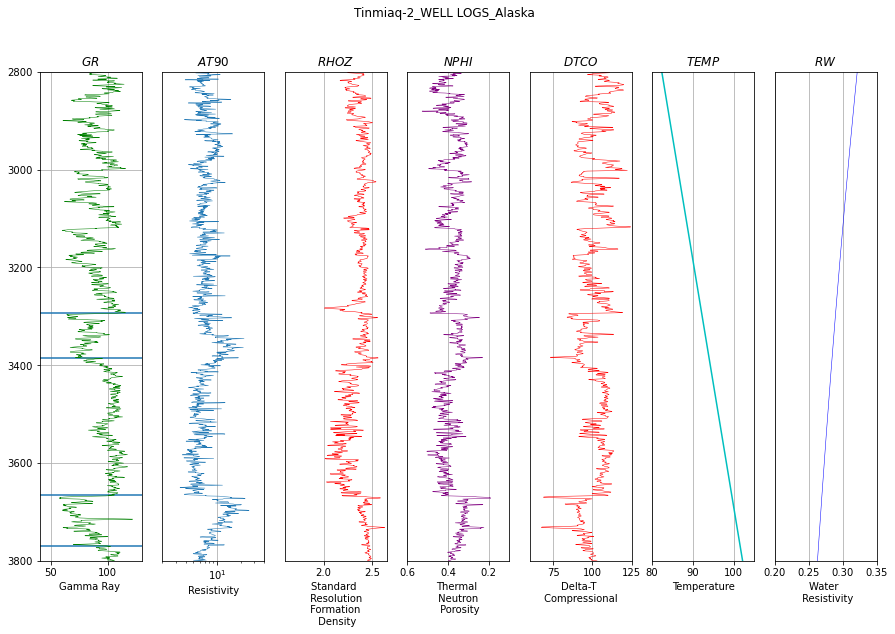

In [130]:
plt.figure(figsize=(15,9))
plt.subplot(171)
plt.plot(df_1.GR_EDTC,df_1.DEPTH,'g',lw=0.5)
plt.title('$GR$')
plt.axis([40, 130, dt,bt])
plt.xlabel('Gamma Ray ')
plt.gca().invert_yaxis()
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3769.49, xmin=0, xmax=130)

plt.hlines(y=3292.25, xmin=0, xmax=130)
plt.hlines(y=3384.75, xmin=0, xmax=130)

plt.hlines(y=2346.92, xmin=0, xmax=130)
plt.hlines(y=2500.65, xmin=0, xmax=130)


plt.subplot(172)
plt.plot(df_1.AT90,df_1.DEPTH,lw=0.5)
plt.axis([2, 40, dt,bt])
plt.title('$AT90$')
plt.xlabel('Resistivity')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(173)
plt.plot(df_1.RHOZ,df_1.DEPTH,'red',lw=0.5)
plt.axis([1.6, 2.65, dt,bt])
plt.title('$RHOZ$')
plt.xlabel('Standard \n Resolution \n Formation \n Density') #\n ( G/C3)'  DENTRO DEL PARENTESIS
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(174)
plt.plot(df_1.NPHI,df_1.DEPTH,'purple',lw=0.5)
plt.axis([0.6, 0.1, dt,bt])
plt.title('$NPHI$')
plt.xlabel('Thermal \n Neutron \n Porosity')
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(175)
plt.plot(df_2.DTCO,Depth,'r',lw=0.5)
plt.title('$DTCO$')
plt.xlabel('Delta-T \n Compressional ')
plt.axis([60,125, dt,bt])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(176)
plt.plot(temp,df_1.DEPTH,'c')
plt.axis([80, 105, dt,bt])
plt.gca().invert_yaxis()
plt.title('$TEMP$')
plt.xlabel('Temperature')
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(177)
plt.plot(df_1.RW2,df_1.DEPTH,'blue',lw=0.5)
plt.title('$RW$')
plt.axis([0.2, 0.35, dt,bt])
plt.xlabel('Water \n Resistivity')
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)



plt.suptitle('Tinmiaq-2_WELL LOGS_'+ las.well['STAT']['value'])



plt.show()

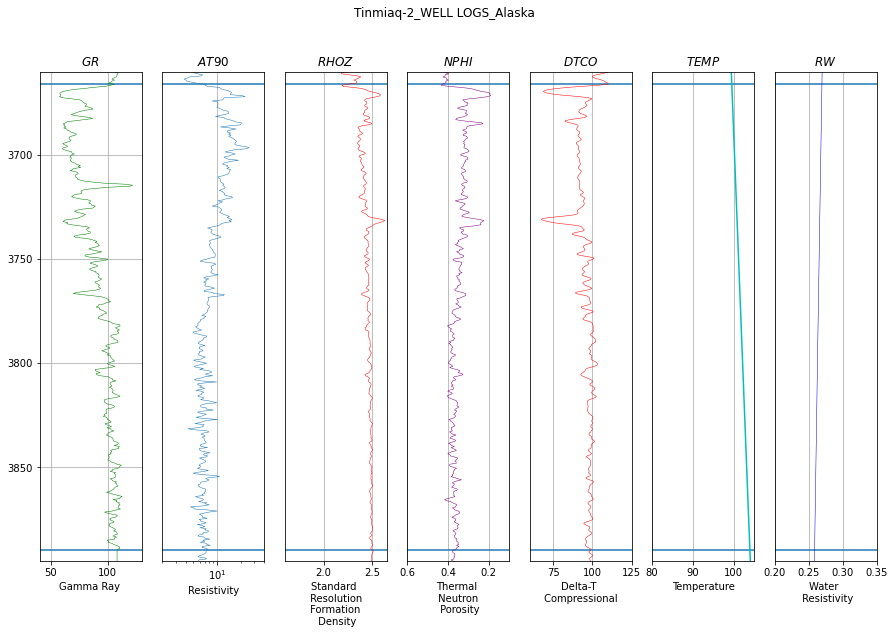

In [131]:
plt.figure(figsize=(15,9))
plt.subplot(171)
plt.plot(df_1.GR_EDTC,df_1.DEPTH,'g',lw=0.5)
plt.title('$GR$')
plt.axis([40, 130, top,bottom])
plt.xlabel('Gamma Ray ')
plt.gca().invert_yaxis()
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)


plt.subplot(172)
plt.plot(df_1.AT90,df_1.DEPTH,lw=0.5)
plt.axis([2, 40, top,bottom])
plt.title('$AT90$')
plt.xlabel('Resistivity')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(173)
plt.plot(df_1.RHOZ,df_1.DEPTH,'red',lw=0.5)
plt.axis([1.6, 2.65,top,bottom])
plt.title('$RHOZ$')
plt.xlabel('Standard \n Resolution \n Formation \n Density') #\n ( G/C3)'  DENTRO DEL PARENTESIS
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(174)
plt.plot(df_1.NPHI,df_1.DEPTH,'purple',lw=0.5)
plt.axis([0.6, 0.1,top,bottom])
plt.title('$NPHI$')
plt.xlabel('Thermal \n Neutron \n Porosity')
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(175)
plt.plot(df_2.DTCO,Depth,'r',lw=0.5)
plt.title('$DTCO$')
plt.xlabel('Delta-T \n Compressional ')
plt.axis([60,125, top,bottom])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(176)
plt.plot(temp,df_1.DEPTH,'c')
plt.axis([80, 105,top,bottom])
plt.gca().invert_yaxis()
plt.title('$TEMP$')
plt.xlabel('Temperature')
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(177)
plt.plot(df_1.RW2,df_1.DEPTH,'blue',lw=0.5)
plt.title('$RW$')
plt.axis([0.2, 0.35,top,bottom])
plt.xlabel('Water \n Resistivity')
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)



plt.suptitle('Tinmiaq-2_WELL LOGS_'+ las.well['STAT']['value'])



plt.show()

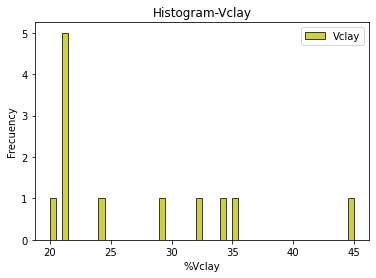

In [132]:
xls = pd.read_excel (r'C:\Users\Angelica\Desktop\Tinmiaq_2\Information_T2.xlsx', sheet_name='Difraction')
prof=xls['Depth (ft)']
clays=xls['Clays']

xls1 = pd.read_excel (r'C:\Users\Angelica\Desktop\Tinmiaq_2\Information_T2.xlsx', sheet_name='Routine Core')
long=xls1['depth']
poro=xls1['Porosity']
grain=xls1['Grain Density']
sw_core=xls1['tracer adjust water (sw)']
minimo=(min(grain))
maximo=(max(grain))
c=2.65
d=2.75
norm=(((grain-minimo)*(d-c)/(maximo-minimo))+c)

xls2 = pd.read_excel (r'C:\Users\Angelica\Desktop\Tinmiaq_2\Information_T2.xlsx', sheet_name='Core Gamma')
h=xls2['DEPTH']
cg=xls2['Core Gamma']
cg1=xls2['core']

xls3 = pd.read_excel (r'C:\Users\Angelica\Desktop\Tinmiaq_2\Information_T2.xlsx', sheet_name='XRD_%Vol')
cl=xls3['Clays']
dp=xls3['Depth (ft)']
plt.hist(cl,bins=50,facecolor='y',alpha=0.75,ec='black', label="Vclay")
plt.title('Histogram-Vclay')
plt.xlabel('%Vclay')
plt.ylabel('Frecuency')
plt.legend()


In [133]:
## SW_Archie
## SW=((a*Rw)/(Rt*(Por)^m))^(1/n)
## Rt= df_1.AT90
## Rw= df_1.RW2
a=1
m=2
n=2
Rw=df_1.RW2
Rt=df_1.AT90
Phi=df_1.porosity
F = (a / (Phi**m))
df_1['Sw_a']  = (F *Rw/Rt)**(1/n)
df_1['Sw_a1']= df_1['Sw_a'].apply(lambda x: 1 if x>1 else x)
df_1['Sw_a1'] = df_1['Sw_a1'].replace(np.nan, 1)
print(df_1.Sw_a1)

DEPT
3972.0    1.000000
3971.5    1.000000
3971.0    1.000000
3970.5    1.000000
3970.0    1.000000
            ...   
2552.5    0.610094
2552.0    0.749572
2551.5    0.782050
2551.0    0.766993
2550.5    0.811250
Name: Sw_a1, Length: 2844, dtype: float64


In [134]:
xls4 = pd.read_excel (r'C:\Users\Angelica\Desktop\Tinmiaq_2\Information_T2.xlsx', sheet_name='SW')
log=xls4['LOG_AT90']

In [135]:
df_1['p10']=np.percentile(log,10)
df_1['Rsh']=(10**(df_1.p10))
print((df_1.Rsh))

DEPT
3972.0    5.18482
3971.5    5.18482
3971.0    5.18482
3970.5    5.18482
3970.0    5.18482
           ...   
2552.5    5.18482
2552.0    5.18482
2551.5    5.18482
2551.0    5.18482
2550.5    5.18482
Name: Rsh, Length: 2844, dtype: float64


In [141]:
## TERM1= 1/RT - VSH/RSH
df_1['term1']=(1/df_1.AT90)-(df_1.Vsh/df_1.Rsh)
## TERM2 = F*RW
term2=(F*df_1.RW2)
## TERM3 = (1-vsh)
term3=(1-df_1.Vsh)
## SW_POUPON = ((TERM1*TERM2)/TERM3))^(1/N)
df_1['Sw_p']=((df_1.term1*term2)/term3)**(1/n)

df_1['Sw_p1']= df_1['Sw_p'].apply(lambda x: 1 if x >0 else x)
df_1['Sw_p1'] = df_1['Sw_p1'].replace(np.nan, 1)
max = a if (a > b) else b;

print(df_1.Sw_p1)

DEPT
3729.5    1.000000
3729.0    1.000000
3728.5    1.000000
3728.0    1.000000
3727.5    0.091393
            ...   
2552.5    1.000000
2552.0    1.000000
2551.5    1.000000
2551.0    1.000000
2550.5    1.000000
Name: Sw_p1, Length: 2359, dtype: float64


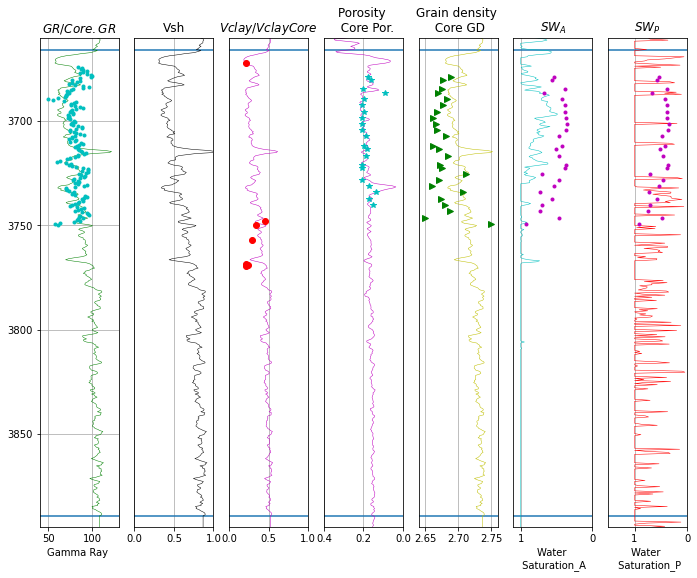

In [137]:
plt.figure(figsize=(15,9))
plt.subplot(191)
plt.plot (df_1.GR_EDTC,df_1.DEPTH,'g',cg1,(h+3),'c.',lw=0.5)
plt.title('$GR/ Core.GR $')
plt.axis([40,130,top,bottom])
plt.xlabel('Gamma Ray ')
plt.gca().invert_yaxis()
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)


plt.subplot(192)
plt.title('Vsh')
plt.plot (df_1.Vsh,df_1.DEPTH,'black',lw=0.5)
plt.axis([0,1, top,bottom])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(193)
plt.title('$Vclay/Vclay Core$')
plt.plot (df_1.Vclay,df_1.DEPTH,'m',clays,(prof+3),'ro',lw=0.5)
plt.axis([0,1, top,bottom])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(194)
plt.title('Porosity \n  Core Por.')
plt.plot (df_1.porosity,df_1.DEPTH,'m',poro,(long+3),'c*',lw=0.5)
plt.axis([0, 0.4, top,bottom])
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(195)
plt.title('Grain density \n Core GD')
plt.plot (df_1.grain_density,df_1.DEPTH,'y',norm,(long+3),'g>',lw=0.5)
plt.axis([2.64, 2.76, top,bottom])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(196)
plt.plot (df_1.Sw_a1,df_1.DEPTH,'c',sw_core,(long+3),'m.',lw=0.5)
plt.title('$SW_A$')
plt.axis([0,1.1,top,bottom])
plt.xlabel('Water \n Saturation_A')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(197)
plt.plot (df_1.Sw_p1,df_1.DEPTH,'r',sw_core,(long+3),'m.',lw=0.5)
plt.title('$SW_P$')
plt.axis([0,1.5,top,bottom])
plt.xlabel('Water \n Saturation_P')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

In [138]:
df_1 = df_1.loc[(df_1.DEPTH>=2500) &  (df_1.DEPTH<=3730)]
df_1.head()

,GR_EDTC,RHOZ,DEPTH,AT90,NPHI,Vsh,Vclay,grain_density,porosity,RW2,Sw_a,Sw_a1,p10,Rsh,term1,Sw_p,Sw_p1
DEPT,,,,,,,,,,,,,,,,,
3729.5,77.4474,2.4597,3729.5039,14.3937,0.3313,0.527193,0.316316,2.702719,0.155347,0.266350,0.875666,0.875666,0.714734,5.18482,-0.032205,NaN,1.000000
3729.0,78.7954,2.4507,3729.0039,13.2878,0.3311,0.542171,0.325303,2.704217,0.161902,0.266374,0.874515,0.874515,0.714734,5.18482,-0.029312,NaN,1.000000
3728.5,80.5027,2.4429,3728.5012,12.1796,0.3207,0.561141,0.336685,2.706114,0.167891,0.266399,0.880889,0.880889,0.714734,5.18482,-0.026123,NaN,1.000000
3728.0,77.1377,2.4220,3728.0107,11.5043,0.3028,0.523752,0.314251,2.702375,0.179265,0.266423,0.848907,0.848907,0.714734,5.18482,-0.014092,NaN,1.000000
3727.5,72.9980,2.3968,3727.5073,10.7811,0.2950,0.477756,0.286653,2.697776,0.193004,0.266448,0.814532,0.814532,0.714734,5.18482,0.000610,0.091393,0.091393
